<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Lucas de Britto Vieira.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [15]:
import seaborn as sn

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 16.3MB/s]


In [2]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

In [3]:
df

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801
5,2023-01-06,148.0,191.0,47.647219,2.362449,Orgânico,Mobile,9,2.559353,6.773194
6,2023-01-07,150.0,197.0,49.036840,2.662313,Direto,Mobile,4,2.501274,5.318291
7,2023-01-08,146.0,202.0,47.801333,2.356262,Pago,Desktop,9,2.693574,5.666004
8,2023-01-09,137.0,284.0,46.140695,2.651792,Social,Desktop,2,2.714130,6.134571
9,2023-01-10,131.0,254.0,46.729001,2.569731,Social,Desktop,10,2.698200,5.968601


In [17]:
colunas_selecionadas = ['Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)', 'Páginas por Sessão', 'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']
df_cor = df[colunas_selecionadas]

In [34]:
colunas_selecionadas2 = ['Taxa de Rejeição (%)','Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)']
df_train = df[colunas_selecionadas2]

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [4]:
import plotly.express as px

In [6]:
fig = px.line(df, x="Data", y="Visitantes Únicos", title='Quantidade de Visitante por dia')
fig.show()

In [7]:
fig = px.scatter(
    df,
    x="Tempo Médio de Sessão (minutos)",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Relação entre Tempo Médio de Sessão e Taxa de Conversão",
)
fig.update_layout(
    xaxis_title="Tempo Médio de Sessão",
    yaxis_title="Taxa de Conversão",
    height=500,
    width=800
)
fig.show()


In [8]:
fig = px.scatter(
    df,
    x="Eventos",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Relação entre Eventos e Taxa de Conversão",
)
fig.update_layout(
    xaxis_title="Eventos",
    yaxis_title="Taxa de Conversão",
    height=500,
    width=800
)
fig.show()

In [11]:
fig = px.scatter(
    df,
    x="Sessões",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Relação entre Sessões e Taxa de Conversão",
)
fig.update_layout(
    xaxis_title="Sessões",
    yaxis_title="Taxa de Conversão",
    height=500,
    width=800
)
fig.show()

In [12]:
fig = px.scatter(
    df,
    x="Taxa de Rejeição (%)",
    y="Taxa de Conversão (%)",
    trendline="ols",
    title="Relação entre Taxa de Rejeição e Taxa de Conversão",
)
fig.update_layout(
    xaxis_title="Taxa de Rejeição",
    yaxis_title="Taxa de Conversão",
    height=500,
    width=800
)
fig.show()

In [10]:
fig = px.bar(df, x='Dispositivos', y='Visitantes Únicos')
fig.show()

In [13]:
fig = px.bar(df, x='Principais Origens do Tráfego', y='Visitantes Únicos')
fig.show()

In [18]:
correlation = df_cor.corr()

In [21]:
fig = px.imshow(correlation, text_auto=True)
fig.show()

Com base nas análises realizadas acima, é possível perceber que a Taxa de rejeição (%) e o Tempo Médio de Sessão (minutos) tem um impacto direto na Taxa de Conversão (%). No primeiro caso, quanto menor a taxa de rejeição, maior é a taxa de conversão. E no segundo caso, quanto maior tempo de médio de sessão, maior é a taxa de conversão. Sendo assim, essas 2 variáveis serão consideradas nas simulações abaixo.

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

**IMPACTO DAS MUDANÇAS NA TAXA DE REJEIÇÃO**

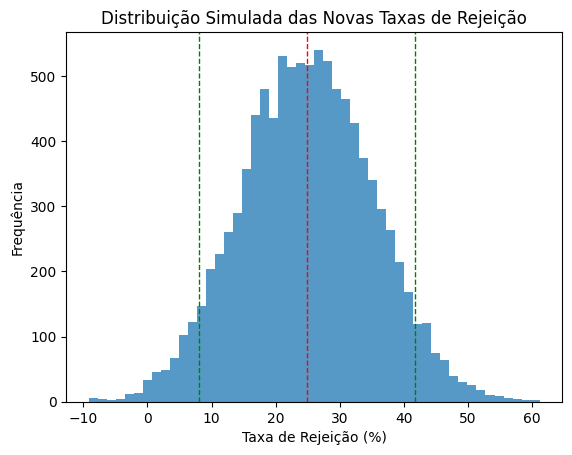

In [23]:
# Calcular médias de taxa de rejeição antes e depois da mudança
mean_rejection_rate_pre_change = df.iloc[:30]['Taxa de Rejeição (%)'].mean()
mean_rejection_rate_post_change = df.iloc[30:]['Taxa de Rejeição (%)'].mean()

# Diferença observada
observed_difference = mean_rejection_rate_post_change - mean_rejection_rate_pre_change

# Simulação de Monte Carlo
n_simulations = 10000
std_dev = df['Taxa de Rejeição (%)'].std()  # Desvio padrão das taxas de rejeição para variabilidade

# Gerar efeitos simulados como uma distribuição normal centrada na diferença observada
simulated_effects = np.random.normal(loc=observed_difference, scale=std_dev, size=n_simulations)

# Taxa de rejeição base para simulação
base_rejection_rate = mean_rejection_rate_pre_change

# Calcular novas taxas de rejeição potenciais
new_rejection_rates = base_rejection_rate + simulated_effects

# Análise dos resultados
average_new_rejection_rate = np.mean(new_rejection_rates)
percentile_5th = np.percentile(new_rejection_rates, 5)
percentile_95th = np.percentile(new_rejection_rates, 95)

plt.hist(new_rejection_rates, bins=50, alpha=0.75)
plt.axvline(x=average_new_rejection_rate, color='r', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_5th, color='g', linestyle='dashed', linewidth=1)
plt.axvline(x=percentile_95th, color='g', linestyle='dashed', linewidth=1)
plt.title('Distribuição Simulada das Novas Taxas de Rejeição')
plt.xlabel('Taxa de Rejeição (%)')
plt.ylabel('Frequência')
plt.show()

**IMPACTO DO TEMPO MÉDIO DE VISITA**

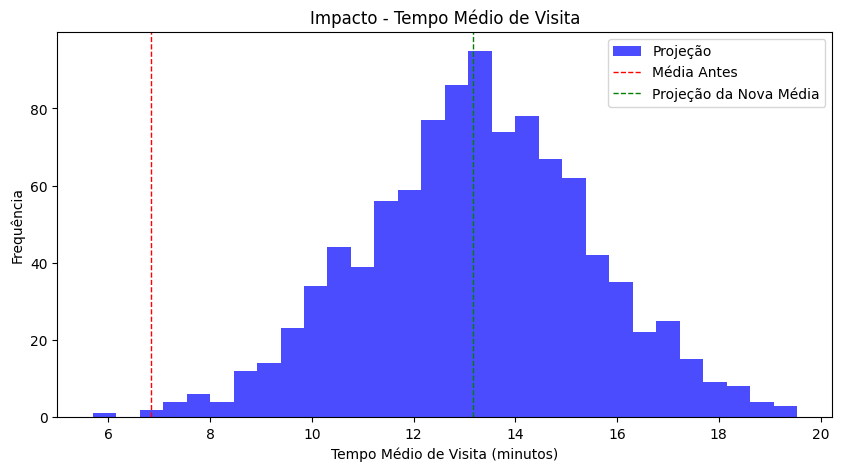

In [41]:
# Escreva sua resposta aqui

import numpy as np
import matplotlib.pyplot as plt

tempos_visita = df['Tempo Médio de Sessão (minutos)']

# Para a simulação, suponhamos que temos dois períodos: antes e depois da mudança anterior similar no dia 30
tempos_antes = tempos_visita[:29]
tempos_depois = tempos_visita[30:]

# Calculando a média e desvio padrão antes e depois da mudança
media_antes = np.mean(tempos_antes)
desvio_padrao_antes = np.std(tempos_antes)
media_depois = np.mean(tempos_depois)
desvio_padrao_depois = np.std(tempos_depois)

# Impacto estimado da mudança anterior
impacto_estimado = (media_depois - media_antes) / media_antes

# Usando esse impacto para estimar o efeito de uma nova mudança similar
nova_media = media_antes * (1 + impacto_estimado)
novo_desvio_padrao = desvio_padrao_antes * (1 + impacto_estimado)

# Simulando 1000 cenários de Monte Carlo com os novos parâmetros
simulacoes = np.random.normal(nova_media, novo_desvio_padrao, 1000)

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.hist(simulacoes, bins=30, alpha=0.7, color='blue', label='Projeção')
plt.axvline(media_antes, color='r', linestyle='dashed', linewidth=1, label='Média Antes')
plt.axvline(nova_media, color='g', linestyle='dashed', linewidth=1, label='Projeção da Nova Média')
plt.title('Impacto - Tempo Médio de Visita')
plt.xlabel('Tempo Médio de Visita (minutos)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [25]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
# Removendo a coluna de data para focar nas variáveis numéricas
X = df_train.drop(["Taxa de Conversão (%)"], axis=1)
y = df_train["Taxa de Conversão (%)"]

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo de floresta aleatória
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.22
MAE: 0.18


**ANÁLISE DE SENSIBILIDADE**

In [37]:
# Suponha que estas sejam as novas taxas de rejeição e tempos de sessão que você quer testar
sensibilidade_df = pd.DataFrame({
    'Taxa de Rejeição (%)': np.linspace(10, 60, 5),  # De 10% a 60% em 5 passos
    'Tempo Médio de Sessão (minutos)': np.linspace(1, 15, 5)  # De 1 a 15 minutos em 5 passos
})

# Previsões usando o modelo treinado
predicted_conversions = model.predict(sensibilidade_df)

# Adicionando as previsões de volta aos dados de teste para análise
sensibilidade_df['Taxa de Conversão Prevista (%)'] = predicted_conversions

sensibilidade_df.head(10)

,Taxa de Rejeição (%),Tempo Médio de Sessão (minutos),Taxa de Conversão Prevista (%)
0,10.0,1.0,4.505734
1,22.5,4.5,4.510939
2,35.0,8.0,4.313597
3,47.5,11.5,4.167595
4,60.0,15.0,4.608729


In [38]:
# Configurações do modelo
n_simulations = 1000
predicted_conversions = []

for _ in range(n_simulations):
    # O método de bootstrapping nesta linha de código cria uma nova amostra dos dados originais,
    # permitindo repetições, para estimar a variabilidade das estatísticas ou do modelo
    bootstrap_sample = resample(X, n_samples=len(X), replace=True, random_state=None)

    # Fazendo previsões com o modelo de floresta aleatória
    predicted_conversion = model.predict(bootstrap_sample)

    # Armazene os resultados
    predicted_conversions.extend(predicted_conversion)

# Converta os resultados em um DataFrame para análise
predicted_conversions_df = pd.DataFrame(predicted_conversions, columns=['Taxa de Conversão Prevista (%)'])

# Calculando estatísticas descritivas
statistics_df = predicted_conversions_df.describe()

print(statistics_df)

       Taxa de Conversão Prevista (%)
count                    60000.000000
mean                         4.505797
std                          1.451147
min                          2.157655
25%                          3.332411
50%                          4.641924
75%                          5.745911
max                          6.977041


In [39]:
# Criando o histograma
fig = px.histogram(predicted_conversions_df, x='Taxa de Conversão Prevista (%)',
                   title='Distribuição da Taxa de Conversão Prevista',
                   labels={'Taxa de Conversão Prevista (%)': 'Taxa de Conversão (%)'},
                   nbins=30,
                   opacity=0.75,  # Opacidade das barras
                   color_discrete_sequence=['indianred'])  # Cor das barras

fig.update_layout(
    xaxis_title='Taxa de Conversão (%)',
    yaxis_title='Contagem',
    bargap=0.2,  # Espaçamento entre as barras
    width=800,
    height=500
)
fig.show()

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.